# 1. Perkenalan
- Nama  : Muhammad Julizar
- Batch : FTDS-RMT-16

### Dataset : Medical Cost Personal Datasets

### Objektif : Membuat model regressi untuk memprediksi biaya tagihan rumah sakit oleh asuransi kesehatan.

# 2. Import Library

In [85]:
# Importing  library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Algoritma model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Model Saving
import joblib
import json


# 3. Data Loading

In [86]:
# Load data
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 1\Milestone\Milestone2\Medical Cost Personal.csv')

In [87]:
# Menampilkan 5 data teratas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
# Menampilkan 5 data terbawah
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [89]:
# Menampilkan info pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Terdapat 1338 baris dan 7 kolom pada dataset kali ini, dengan tipe data float64, int64 dan object atau string

In [90]:
# menampilkan info central tendency pada dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


rata-rata usia adalah 39 tahun dengan biaya rata rata nya 13270 USD

In [91]:
# Memeriksa unique value pada setiap kolom
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# 4. EDA (Explorataory Data Analysis)

In [92]:
# memeriksa missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dari data dapat kita lihat bahwa tidak terdapat missing value

<AxesSubplot: xlabel='sex', ylabel='count'>

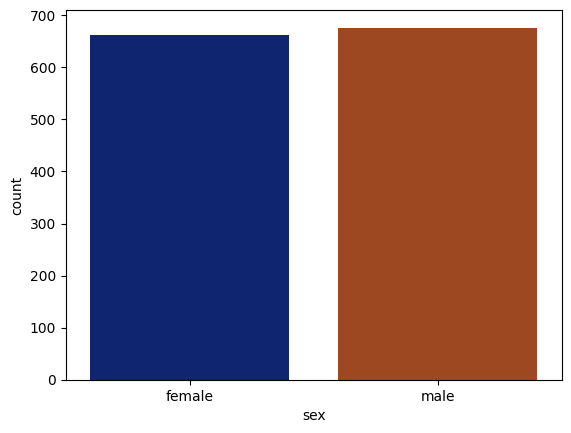

In [93]:
# melihat value apa saja pada kolom marital status
sns.countplot(df, x=df['sex'], palette='dark')

Dari perbandingan gender dapat kita lihat bahwa data tersebut lumayan balance dan tidak memiliki perbedaan yang signifikan

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_32\1947852193.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: xlabel='region', ylabel='charges'>

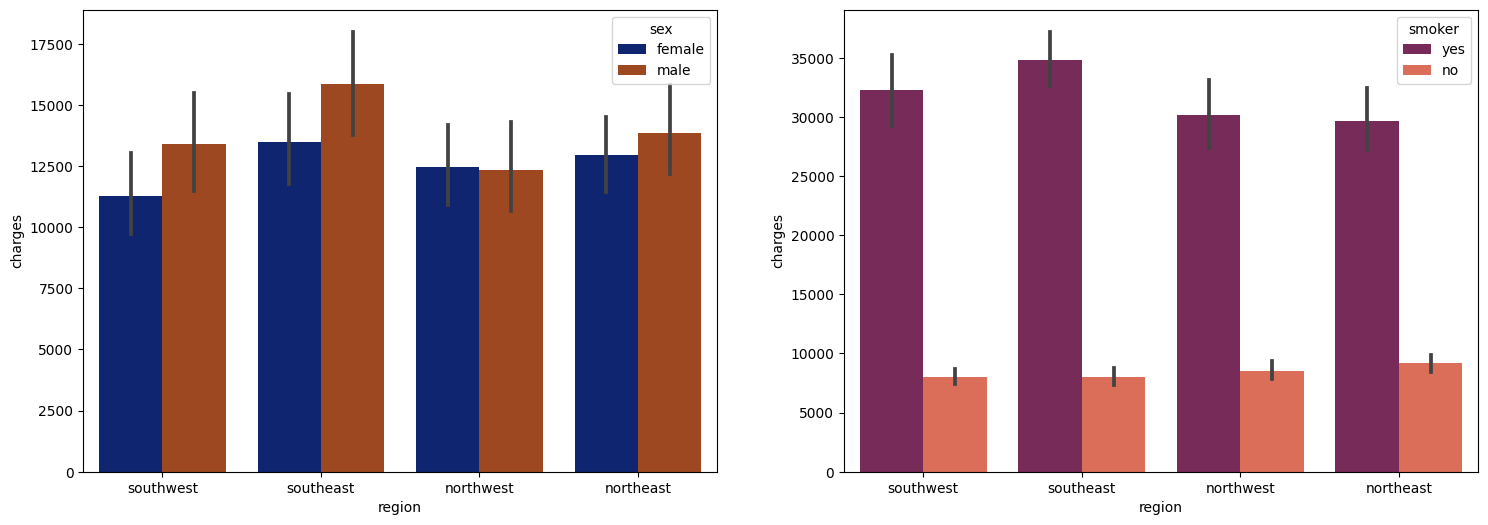

In [94]:
# Membuat barplot
plt.subplots(figsize=(18,6))

# perbandingan gender setiap region
plt.subplot(1,2,1)
sns.barplot(df, x=df['region'], y =df['charges'], hue='sex', palette='dark')

# perbandingan perilaku merokok setiap region
plt.subplot(1,2,2)
sns.barplot(df, x=df['region'], y =df['charges'], hue='smoker', palette='rocket')

Berdasarkan setiap region jika kita lihat berdasarkan gender rata-rata laki laki memiliki tagihan/ biaya rumah sakit lebih tinggi biaya rumah sakit dibandingkan perempuan.
<br>
Namun jika kita lihat berdasarkan perilaku merokok laki-laki lebih banyak masuk rumah sakit dan juga biaya lebih tinggi.<br>hal ini sesuai realita dikarenakan perilaku merokok memang menyebabkan penyakit sehingga biaya rumah sakit menjadi membengkak

In [95]:
# membuat variabel kolom numeric
numeric_list = ["age","bmi","charges","children"]

In [96]:
# melihat skewness
df.skew(numeric_only=True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

<Figure size 2000x800 with 0 Axes>

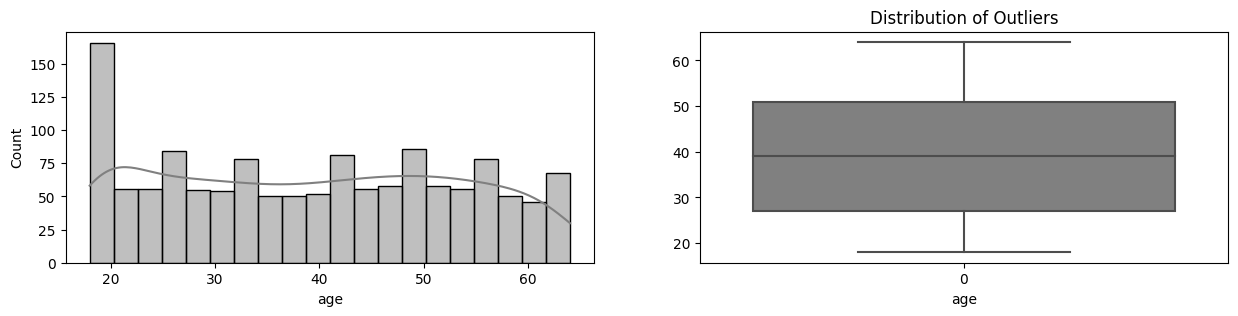

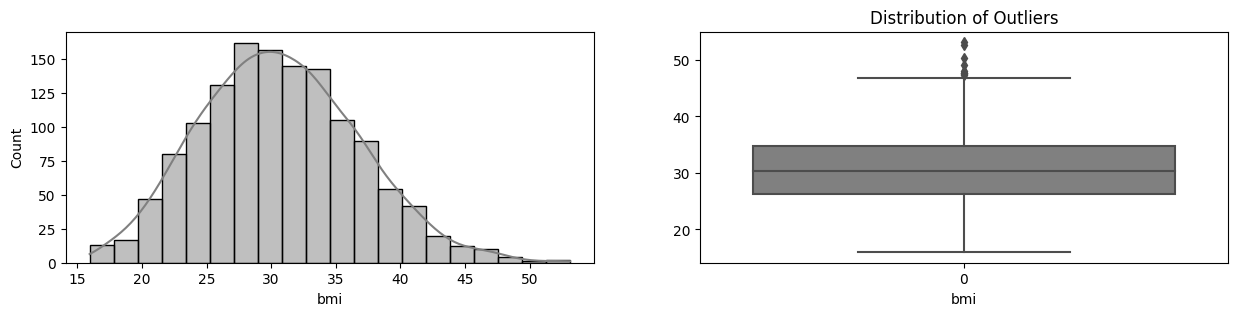

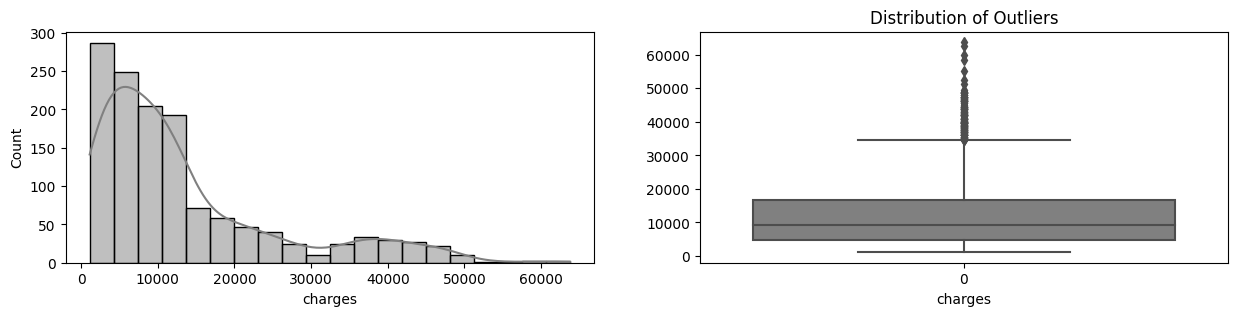

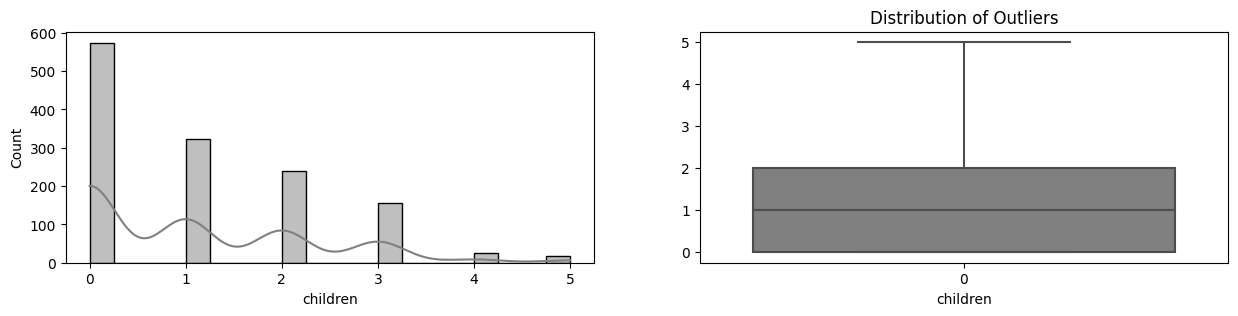

In [97]:
# membuat boxplot setiap kolom numeric
plt.figure(figsize=(20,8))

for i in numeric_list:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    plt.title('Distribution of Outliers')
    sns.histplot(df[i], bins=20, kde=True, ax=axs[0], color='grey')
    sns.boxplot(df[i], ax=axs[1], color='grey')
    plt.xlabel(i)

Dari plot diatas, hanya pada kolom charges yang memiliki outlier dan itu sangat ekstreme

<AxesSubplot: xlabel='children', ylabel='charges'>

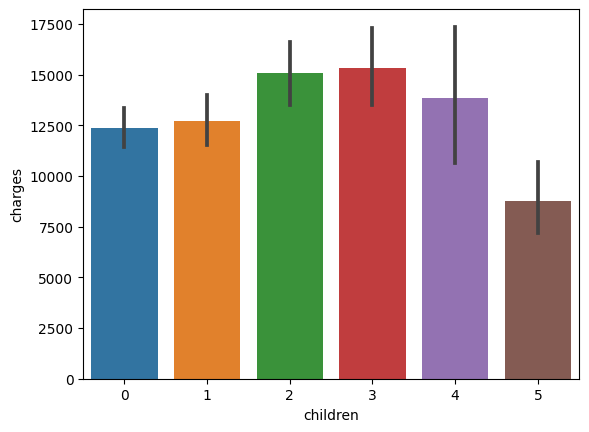

In [98]:
# mellihat tingkat biaya berdasarkan jumlah anak
sns.barplot(data=df, x= df['children'], y=df['charges'])


Melihat berapa banyak tagihan berdasarkan orang tua yang memiliki anak

<AxesSubplot: xlabel='age', ylabel='charges'>

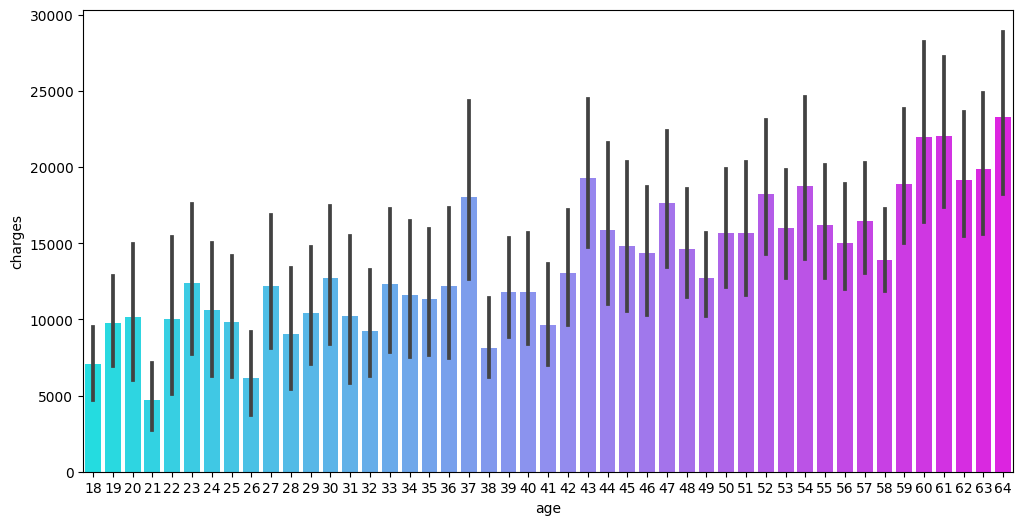

In [99]:
# Plot age by charges
plt.figure(figsize=(12,6))
sns.barplot(df, x=df['age'] , y=df['charges'], palette='cool')

Tagihan berdasarkan umur, dari grafik bisa kita lihat tagihan berdasarkan umur memiliki tren meningkat sehingga semakin tua akan semakin tinggi biaya tagihan rumah sakit

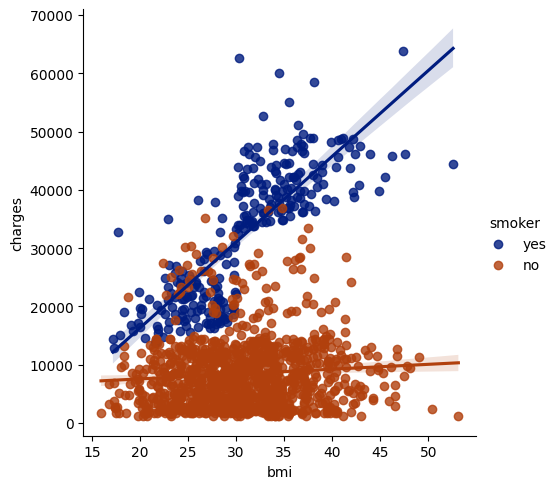

In [100]:
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='dark')


Menurut data bmi, semakin tinggi body mass index seseorang yang merokok akan meningkatkan biaya tagihan rumah sakitnya

# 5.  Data Preprocessing

In [101]:
#split inference
data_inf = df.sample(13, random_state=23)
data_train_test = df.drop(data_inf.index)

In [102]:
#Reset Index 
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,sex,bmi,children,smoker,region,charges
0,61,female,28.200,0,no,southwest,13041.92100
1,31,male,27.645,2,no,northeast,5031.26955
2,35,male,27.740,2,yes,northeast,20984.09360
3,50,female,27.360,0,no,northeast,25656.57526
4,26,female,40.185,0,no,northwest,3201.24515
5,41,male,30.590,2,no,northwest,7256.72310
6,54,male,30.800,1,yes,southeast,41999.52000
7,33,male,35.245,0,no,northeast,12404.87910
8,59,female,27.720,3,no,southeast,14001.13380
9,52,male,41.800,2,yes,southeast,47269.85400


In [103]:
# Split train test 80:20
X_train, X_test = train_test_split(data_train_test, test_size=0.2, random_state=77)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1060, 7)
Test Size  :  (265, 7)


## 5.1 Handling Missing Value

In [104]:
# Check Missing Value
X_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak terdapat missing value pada data set

## 5.2 Handling outlier

<AxesSubplot: xlabel='charges'>

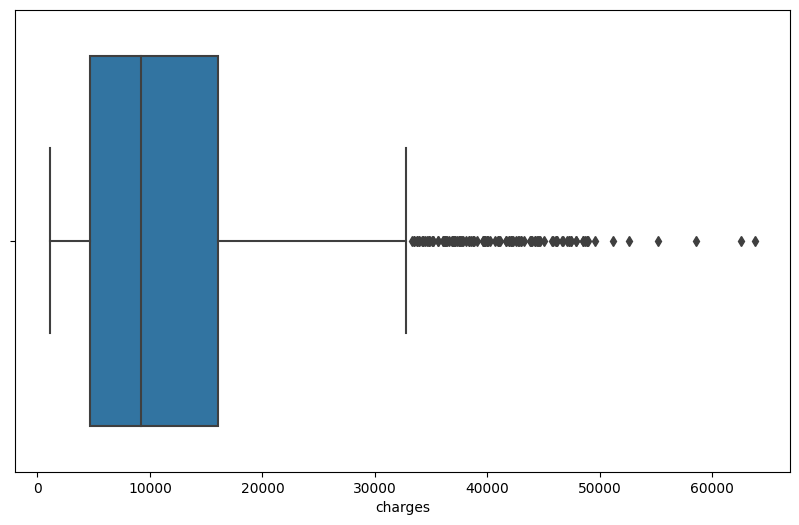

In [105]:
# boxplot to find outlier
plt.figure(figsize=(10,6))
sns.boxplot(data= X_train['charges'], x=X_train['charges'])

Jika kita lihat dari hasil skewness dan distribusi data, diperlukan handling outlier pada kolom charges. karena terdapat outlier yang sangat ekstreme

In [106]:
# Separate column numeric and categorical
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = 'object').columns.tolist()

In [107]:
# define function IQR
def limit(data, variable):    
    IQR= data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    lower_limit = data[variable].quantile(0.25) - (IQR*3)
    upper_limit = data[variable].quantile(0.75) + (IQR*3)
    
    return lower_limit, upper_limit


lower_limit, upper_limit = limit(X_train, 'charges')
lower_limit, upper_limit

(-29660.929412500005, 50373.614075000005)

In [108]:
# Winsorize using IQR method
X_train['charges'] = np.where(X_train["charges"]> upper_limit, upper_limit,
                        np.where(X_train["charges"]< lower_limit, lower_limit,
                          X_train["charges"]))

In [109]:
# Copy dataset
X_train_no_outlier = X_train.copy()
X_train_no_outlier.head(10)

,age,sex,bmi,children,smoker,region,charges
281,55,female,32.395,1,no,northeast,11879.10405
220,32,male,30.800,3,no,southwest,5253.52400
171,18,male,15.960,0,no,northeast,1694.79640
312,27,female,31.400,0,yes,southwest,34838.87300
833,59,male,24.700,0,no,northeast,12323.93600
859,57,male,43.700,1,no,southwest,11576.13000
428,42,male,26.900,0,no,southwest,5969.72300
400,31,male,20.400,0,no,southwest,3260.19900
1256,20,female,33.300,0,no,southwest,1880.48700
247,29,male,28.975,1,no,northeast,4040.55825


1.501950742196791


<AxesSubplot: xlabel='charges'>

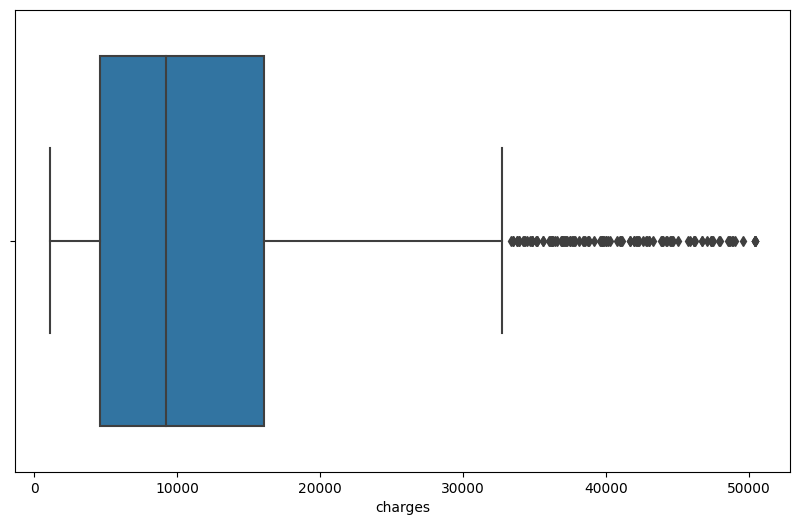

In [110]:
# see boxplot after handling extreme outlier 
print(X_train_no_outlier['charges'].skew())

plt.figure(figsize=(10,6))
sns.boxplot(data=X_train_no_outlier, x=X_train_no_outlier['charges'])

## 5.3 Feature selection

### 5.3.1 Correlation

<AxesSubplot: >

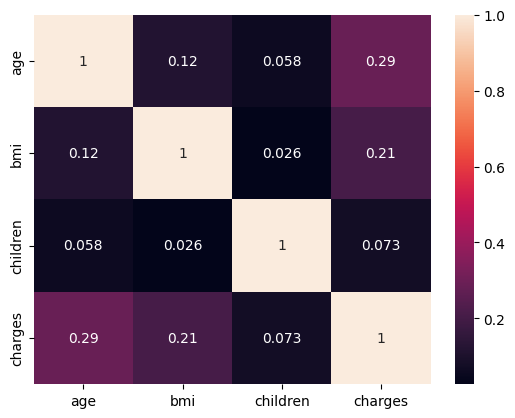

In [111]:
sns.heatmap(X_train_no_outlier.corr(numeric_only=True), annot=True)

In [112]:
# Split beetwen feature and target
X_train = X_train_no_outlier.drop(columns=['charges'])
y_train = X_train_no_outlier['charges']

y_test = X_test['charges']
X_test = X_test.drop(columns=['charges'])

In [113]:
X_test.head()


,age,sex,bmi,children,smoker,region
704,50,female,23.54,2,no,southeast
776,31,female,29.26,1,no,southeast
1068,63,male,33.66,3,no,southeast
894,49,male,36.85,0,no,southeast
85,57,female,31.16,0,yes,northwest


Dari korelasi yang didapatkan, hanya 2 kolom yang memiliki korelasi tinggi, yaitu kolom `age` dan kolom `bmi`

### 5.3.2 ANOVA

P-Value <= 0.05 : Use features<br>
P-Value > 0.05  : Drop the features

In [114]:
# see categorical columns
cat_columns

['sex', 'smoker', 'region']

In [115]:
# make dataset only for categorical
X_train_cat = X_train[cat_columns]
X_test_cat = X_train[cat_columns]
X_train_cat.head()

,sex,smoker,region
281,female,no,northeast
220,male,no,southwest
171,male,no,northeast
312,female,yes,southwest
833,male,no,northeast


In [116]:
# encoding for anova test
oe = OrdinalEncoder()
oe.fit(X_train_cat)

X_train_anova = oe.fit_transform(X_train_cat)


c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


<AxesSubplot: >

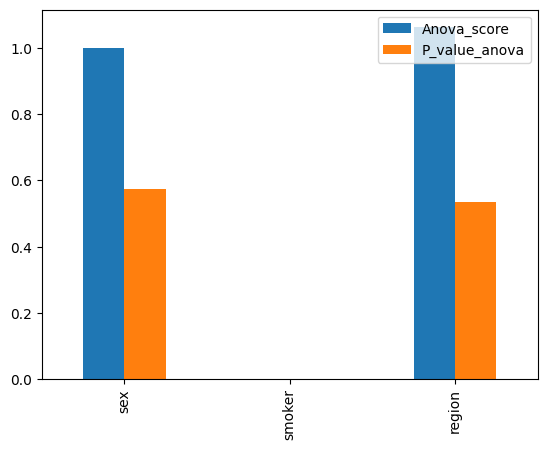

In [117]:
# anova test
select = SelectKBest(score_func=f_classif, k=2)
select.fit_transform(X_train_anova,y_train)


filter = select.get_support()
features = np.array(X_train_cat.columns)

anova_score = pd.DataFrame({'Anova_score':select.scores_, 'P_value_anova': select.pvalues_}, index=X_train_cat.columns )
anova_score.plot(kind='bar')


Setelah dilakukan feature selection using ANOVA didapatkan kolom dengan pvalue <= 0.05 adalah kolom smoker

In [118]:
# select feature after feature selection
X_train_final = X_train[['age', 'bmi', 'smoker','region']]
X_test_final = X_test[['age', 'bmi', 'smoker', 'region']]

## 5.3.3 Preprocessing

In [119]:
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

In [120]:
numerical_features = ['age', 'bmi']
categorical_features = ['smoker','region']

In [121]:
preprocessor = ColumnTransformer(transformers=
    [('numerical',MinMaxScaler(), numerical_features), 
    ('categorical', OrdinalEncoder(), categorical_features)]
)
preprocessor

ColumnTransformer(transformers=[('numerical', MinMaxScaler(), ['age', 'bmi']),
                                ('categorical', OrdinalEncoder(),
                                 ['smoker', 'region'])])

# 6. Model Definition

In [122]:
# Definition 4 model
lr = LinearRegression()
rf = RandomForestRegressor(random_state=77)
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()


# 7. Model Training

In [123]:
# model training using pipeline
pipeline_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("lr", lr)])

pipeline_rf = Pipeline(
    steps=[('preprcosseor', preprocessor), ('rf', rf)])

pipeline_gb = Pipeline(
    steps=[('preprcosseor', preprocessor), ('gb', gb)])

pipeline_knn = Pipeline(
    steps=[('preprocessor', preprocessor), ('knn', knn)])

### 7.1 Linear Regressi

In [124]:
# fit model
pipeline_lr.fit(X_train_final,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'region'])])),
                ('lr', LinearRegression())])

#### 7.2 Random Forest

In [125]:
# fit model
pipeline_rf.fit(X_train_final,y_train)

Pipeline(steps=[('preprcosseor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'region'])])),
                ('rf', RandomForestRegressor(random_state=77))])

#### 7.3 Gradient Booster

In [126]:
# fit model
pipeline_gb.fit(X_train_final,y_train)

Pipeline(steps=[('preprcosseor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'region'])])),
                ('gb', GradientBoostingRegressor())])

#### 7.4 KNeighbors

In [127]:
# fit model
pipeline_knn.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'region'])])),
                ('knn', KNeighborsRegressor())])

# 8. Model Evaluation

### 8.1.1 Linear Regression

In [128]:
# predict model
lr_pred_train = pipeline_lr.predict(X_train_final)
lr_pred_test = pipeline_lr.predict(X_test_final)

### 8.1.2  Random Forest

In [129]:
# predict model
rf_pred_train = pipeline_rf.predict(X_train_final)
rf_pred_test = pipeline_rf.predict(X_test_final)


### 8.1.3 GradientBoosting

In [130]:
# predict model
gb_pred_train = pipeline_gb.predict(X_train_final)
gb_pred_test = pipeline_gb.predict(X_test_final)

### 8.1.4 KNN

In [131]:
# predict model
knn_pred_train = pipeline_knn.predict(X_train_final)
knn_pred_test = pipeline_knn.predict(X_test_final)

## 8.2 Hasil Evaluasi

In [132]:
# r2score
all_reports= {}
score1 = {
        'Linear Regression -Trein'   : round(r2_score(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(r2_score(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(r2_score(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(r2_score(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(r2_score(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(r2_score(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(r2_score(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(r2_score(knn_pred_test,y_test ),2)
}
all_reports['R2score'] = score1

a = pd.DataFrame(all_reports)

In [133]:
# MAE
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test,y_test ),2)
}
all_reports['MAE'] = score2

b = pd.DataFrame(all_reports)

In [134]:
# RMSE
score3 = {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train,y_train)), 2),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test, y_test)), 2),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train,y_train)),2),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test,y_test)),2),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train,y_train)),2),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test,y_test)),2),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train,y_train)),2),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test,y_test)),2)
}
all_reports['RMSE'] = score3

c = pd.DataFrame(all_reports)

In [135]:
# MSE
score4 = {
        'Linear Regression -Trein'   : round(mean_squared_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_squared_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_squared_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_squared_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_squared_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_squared_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_squared_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_squared_error(knn_pred_test,y_test ),2)
}
all_reports['MSE'] = score4

d = pd.DataFrame(all_reports)
d

,R2score,MAE,RMSE,MSE
Linear Regression -Trein,0.68,4072.64,5862.63,34370438.08
Linear Regression -Test,0.64,4417.51,6366.92,40537647.74
Random Forest -Train,0.97,1030.43,1896.81,3597889.37
Random Forest -Test,0.78,3152.16,5498.61,30234710.25
GradientBoosting -Train,0.89,1997.78,3651.79,13335604.62
GradientBoosting -Test,0.81,2655.55,4929.77,24302635.70
KNeighborsRegressor -Train,0.86,2399.01,4087.76,16709758.30
KNeighborsRegressor -Test,0.76,3221.84,5453.62,29741929.29


<AxesSubplot: >

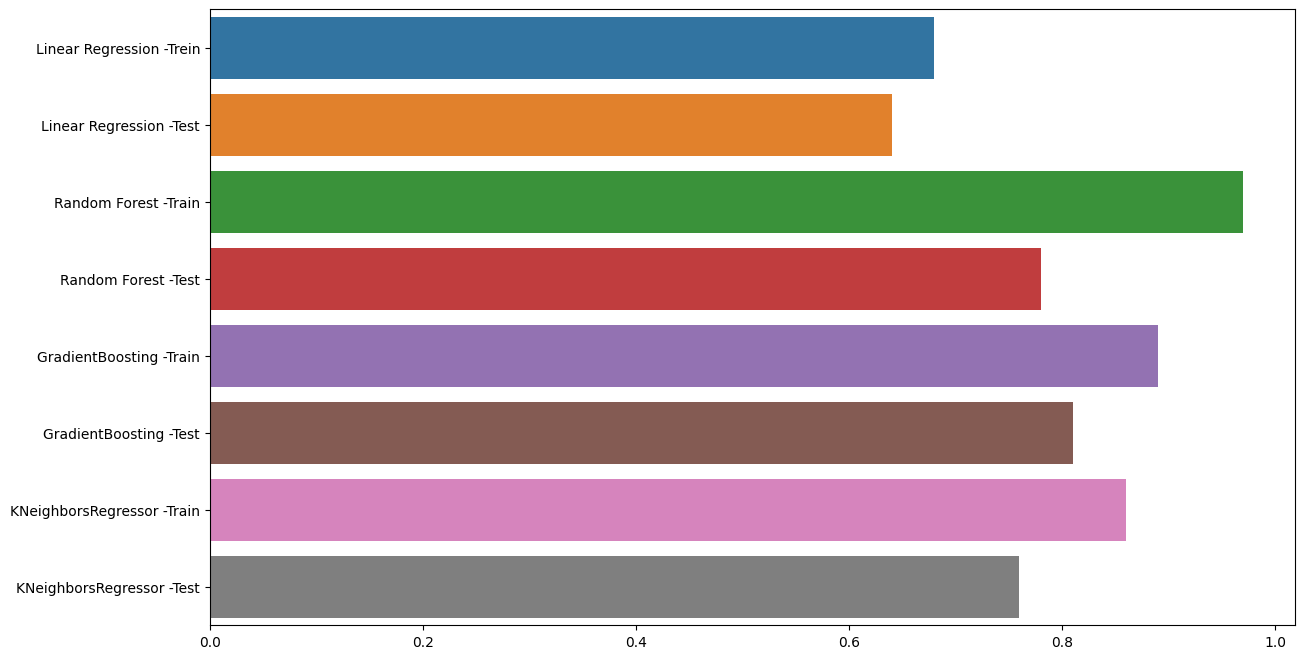

In [136]:
# plotting r2 score evaluation 
plt.figure(figsize=(14,8))
sns.barplot(d,y=d['R2score'].index,x=d['R2score'].values)

## 8.3 Hyperparamter Tuning using GridSearchCV

In [137]:
# Parameter Liner regression
parameter_lr ={
    'lr__n_jobs' : [1,2,3]
    }

# Parameter random forest
parameter_rf = {
    'rf__n_estimators' : [200,250,500,700],
    'rf__criterion' : ['squared_error', 'absolute_error'],
    'rf__max_depth': [2,3,4]
}

parameter_gb = {
    'gb__n_estimators'  : [200,300,500,1000],
    'gb__learning_rate' : [0.1,0.3,0.4],
}

parameter_knn = {
    'knn__n_neighbors' : [3,4],
    'knn__leaf_size' : [30, 45]
}

### 8.3.1 Tuning Linear Regression

In [138]:
# Tuning Process Linear Regrssion
lr_grid = GridSearchCV(estimator=pipeline_lr,
                         param_grid=parameter_lr,
                         cv=5,
                         verbose=1)
lr_grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(),
                                                                         ['smoker',
                                                                          'region'])])),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__n_jobs': [1, 2, 3]}, verbose=1)

In [139]:
# best parameter linear regression
lr_grid.best_params_

{'lr__n_jobs': 1}

In [140]:
# predict using best parameter
lr_grid_best = lr_grid.best_estimator_

lr_grid_best.fit(X_train_final,y_train)
lr_pred_train_tune = lr_grid_best.predict(X_train_final)
lr_pred_test_tune = lr_grid_best.predict(X_test_final)


### 8.3.2 Tuning Random Forest

In [141]:
# Tuning Process Random Forest

rf_grid = GridSearchCV(estimator=pipeline_rf,
                         param_grid=parameter_rf,
                         cv=5,
                         verbose=1
                        )
rf_grid.fit(X_train_final,y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprcosseor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(),
                                                                         ['smoker',
                                                                          'region'])])),
                                       ('rf',
                                        RandomForestRegressor(random_state=77))]),
             param_grid={'rf__criterion': ['squared_error', 'absolute_error'],
                         'rf__max_depth': [2, 3, 4],
                         'rf__n_estimators': [200, 250, 500, 700]},
             verbose=1)

In [142]:
# best parameter random forest
rf_grid.best_params_

{'rf__criterion': 'squared_error', 'rf__max_depth': 4, 'rf__n_estimators': 700}

In [143]:
# predict using best parameter
rf_grid_best = rf_grid.best_estimator_

rf_grid_best.fit(X_train_final, y_train)
rf_pred_train_tune =rf_grid_best.predict(X_train_final)
rf_pred_test_tune =rf_grid_best.predict(X_test_final)

### 8.3.3 Tuning Gradient Boosting

In [144]:
# tuning parameter gradient boosting
gb_grid = GridSearchCV(estimator=pipeline_gb,
                         param_grid=parameter_gb,
                         cv=5,
                         verbose=1
                        )
gb_grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprcosseor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(),
                                                                         ['smoker',
                                                                          'region'])])),
                                       ('gb', GradientBoostingRegressor())]),
             param_grid={'gb__learning_rate': [0.1, 0.3, 0.4],
                         'gb__n_estimators': [200, 300, 500, 1000]},
             verbose=1)

In [145]:
# best parameter gradient boosting
gb_grid.best_params_

{'gb__learning_rate': 0.1, 'gb__n_estimators': 200}

In [146]:
# predict using best parameter 
gb_grid_best = gb_grid.best_estimator_

gb_grid_best.fit(X_train_final,y_train)
gb_pred_train_tune = gb_grid_best.predict(X_train_final)
gb_pred_test_tune = gb_grid_best.predict(X_test_final)

### 8.3.4 Tuning KNN

In [147]:
# tuning parameter Knneighbors regresor
knn_grid = GridSearchCV(estimator=pipeline_knn,
                         param_grid=parameter_knn,
                         cv=5,
                         verbose=1
                        )
knn_grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(),
                                                                         ['smoker',
                                                                          'region'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__leaf_size': [30, 45],
                         'knn__n_neighbors': [3, 4]},
             verbose=1)

In [148]:
# Kneighbors best parameter
knn_grid.best_params_

{'knn__leaf_size': 30, 'knn__n_neighbors': 4}

In [149]:
# predict using best parameter
knn_grid_best = knn_grid.best_estimator_

knn_grid_best.fit(X_train_final,y_train)
knn_pred_train_tune = knn_grid_best.predict(X_train_final)
knn_pred_test_tune = knn_grid_best.predict(X_test_final)

## 8.4 Scoring dari Hasil Tuning Parameter

In [150]:
# Scoring to data frame
# r2 score
all_reports= {}
score1 = {
        'Linear Regression -Trein'   : round(r2_score(lr_pred_train_tune,y_train), 2),
        'Linear Regression -Test'    : round(r2_score(lr_pred_test_tune, y_test), 2),
        'Random Forest -Train'       : round(r2_score(rf_pred_train_tune,y_train),2),
        'Random Forest -Test'        : round(r2_score(rf_pred_test_tune,y_test),2),
        'GradientBoosting -Train'    : round(r2_score(gb_pred_train_tune,y_train),2),
        'GradientBoosting -Test'     : round(r2_score(gb_pred_test_tune,y_test),2),
        'KNeighborsRegressor -Train' : round(r2_score(knn_pred_train_tune,y_train ),2),
        'KNeighborsRegressor -Test' : round(r2_score(knn_pred_test_tune,y_test ),2)
}
all_reports['R2score'] = score1

tune_a = pd.DataFrame(all_reports)


In [151]:
# MAE
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train_tune,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test_tune, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train_tune,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test_tune,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train_tune,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test_tune,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train_tune,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test_tune,y_test ),2)
}
all_reports['MAE'] = score2

tune_b = pd.DataFrame(all_reports)

In [152]:
# RMSE
score3= {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train_tune,y_train)), 2),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test_tune, y_test)), 2),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train_tune,y_train)),2),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test_tune,y_test)),2),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train_tune,y_train)),2),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test_tune,y_test)),2),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train_tune,y_train )),2),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test_tune,y_test )),2)
}
all_reports['RMSE'] = score3

tune_c = pd.DataFrame(all_reports)


In [153]:
# MSE
score4= {
        'Linear Regression -Trein'   : round(mean_squared_error(lr_pred_train_tune,y_train), 2),
        'Linear Regression -Test'    : round(mean_squared_error(lr_pred_test_tune, y_test), 2),
        'Random Forest -Train'       : round(mean_squared_error(rf_pred_train_tune,y_train),2),
        'Random Forest -Test'        : round(mean_squared_error(rf_pred_test_tune,y_test),2),
        'GradientBoosting -Train'    : round(mean_squared_error(gb_pred_train_tune,y_train),2),
        'GradientBoosting -Test'     : round(mean_squared_error(gb_pred_test_tune,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_squared_error(knn_pred_train_tune,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_squared_error(knn_pred_test_tune,y_test ),2)
}
all_reports['MSE'] = score4

tune_d = pd.DataFrame(all_reports)
tune_d

,R2score,MAE,RMSE,MSE
Linear Regression -Trein,0.68,4072.64,5862.63,34370438.08
Linear Regression -Test,0.64,4417.51,6366.92,40537647.74
Random Forest -Train,0.86,2295.81,4145.48,17185021.98
Random Forest -Test,0.81,2697.48,4887.70,23889588.42
GradientBoosting -Train,0.92,1752.86,3160.97,9991762.57
GradientBoosting -Test,0.81,2679.15,5010.29,25102981.67
KNeighborsRegressor -Train,0.87,2270.52,3922.45,15385647.18
KNeighborsRegressor -Test,0.76,3216.48,5565.50,30974817.63


# 9. Model Saving

In [154]:
with open('gb_grid_best.pkl', 'wb') as file_1:
  joblib.dump(gb_grid_best, file_1)

with open('numerical_features.txt', 'w') as file_2:
  json.dump(numerical_features, file_2)

with open('categorical_features.txt', 'w') as file_3:
  json.dump(categorical_features, file_3)


In [155]:
with open('gb_grid_best.pkl', 'rb') as file_1:
  gb_grid_best = joblib.load(file_1)

with open('numerical_features.txt', 'r') as file_2:
  numerical_features = json.load(file_2)

with open('categorical_features.txt', 'r') as file_3:
  categorical_features = json.load(file_3)


# 10. Model Inference

In [156]:
# Menampilkan data inference
data_inf.head()

,age,sex,bmi,children,smoker,region,charges
0,61,female,28.200,0,no,southwest,13041.92100
1,31,male,27.645,2,no,northeast,5031.26955
2,35,male,27.740,2,yes,northeast,20984.09360
3,50,female,27.360,0,no,northeast,25656.57526
4,26,female,40.185,0,no,northwest,3201.24515


In [157]:
# menentukan feature dan terget pada data inference
X_inf = data_inf.drop(columns={'charges'})
y_inf = data_inf['charges']
y_inf.reset_index(drop=True, inplace=True)

In [158]:
pred_inf = gb_grid_best.predict(X_inf)

In [159]:
pred_inf_df = pd.DataFrame(pred_inf, columns=['charges- prediction'])

In [160]:
# membandingkan hasil prediksi dengan data aktual
pred_inf_df= pd.concat([data_inf,pred_inf_df], axis=1)
pred_inf_df

,age,sex,bmi,children,smoker,region,charges,charges- prediction
0,61,female,28.200,0,no,southwest,13041.92100,15222.289168
1,31,male,27.645,2,no,northeast,5031.26955,7876.360258
2,35,male,27.740,2,yes,northeast,20984.09360,22557.715946
3,50,female,27.360,0,no,northeast,25656.57526,11204.629890
4,26,female,40.185,0,no,northwest,3201.24515,5445.800632
5,41,male,30.590,2,no,northwest,7256.72310,8487.478284
6,54,male,30.800,1,yes,southeast,41999.52000,43375.349497
7,33,male,35.245,0,no,northeast,12404.87910,7754.920721
8,59,female,27.720,3,no,southeast,14001.13380,13771.220416
9,52,male,41.800,2,yes,southeast,47269.85400,45809.775690


In [161]:
# Hasil scoring model menggunakan data inference

print(f'Nilai r2 score : {r2_score(pred_inf,y_inf)}')
print(f'Nilai MAE score : {mean_absolute_error(pred_inf,y_inf)}')
print(f'Nilai MSE score : {mean_squared_error(pred_inf,y_inf)}')
print(f'Nilai RMSE score : {np.sqrt(mean_squared_error(pred_inf,y_inf))}')

Nilai r2 score : 0.8956381353152437
Nilai MAE score : 2701.491954782161
Nilai MSE score : 20031372.773018334
Nilai RMSE score : 4475.642163200531


# 10 Kesimpulan

## Model Analysis
Pada kasus kali ini dilakukan prediksi biaya tagihan rumah sakit dengan menggunakan 4 model regressi yaitu:
- Linear Regressi
- Random Forest
- Gradient Boosting
- KNeirest Regressor

Setelah dilakukan definisi model dan training model, maka selanjutnya dilakukan prediksi model dengan di evaluasi menggunakan r2 score, MAE, RMSE dan MSE <br>
Hasil dari evaluasi menunjukkan bahwa ke 4 model mengalami overfit, hal ini disebabkan oleh masi terdapat banyak varians pada data Test sehingga model kurang baik untuk memprediksi. Namun dari keseluruhan model, Model GradientBoosting memiliki selisih antara train test yang paling kecil dan memiliki erorr yang paling sedikit.

Pada melakukan proses prediksi jika kita lihat nilai kesalahan berdasarkan metriks GRadient boosting merupakan model terbaik pada saat prediksi dengan default parammeter.
dengan hasil:
1. R2score 
    - Train : 89% 
    - Test  : 81%
2. MAE 
    - Train : 1997.78 USD
    - Test  : 2651.65 USD
3. RMSE 
    - Train : 3651.79 USD
    -  Test : 4928.46 USD
4. MSE 
    - Train : 13335604.62 USD
    -  Test : 24289756.09 USD

Dengan nilai diatas menunjukkan bahwa Gradientboosting sangat baik memprediksi hingga `89%` pada data Train namun pada data Test hanya dapat mendapatkan `81%`, dengan nilai `rata-rata kesalahan` pada data Train adalah `1997.78 USD` dan pada Test data `2551.65 USD`. Lalu pada `RMSE` kita bertujuan untuk melihat `berapa besar nilai kesalahan pada data prediksi dibandingkan dengan data aktual` dan didapatkan pada data Train sebesar `3651.79 USD` dan pada data test sebesar `4928.46 USD`<br>

Dari keseluruhan hasil metriks tersebut dapat kita simpulkan bahwa model GradientBoosting merupakan model terbaik dengan keadaan default parameter. Hasil prediksi pada Train data sangat baik namun pada Test data tidak sebaik pada Train data. dan menunjukkan bahwa GradientBoosting overfit.

Selanjutnya dilakukan tuning pada ke 4 model dan lagi-lagi model Gradien boosting mendapatkan nilai r2 score yang paling besar dengan kenaikan `3%` pada Train data menjadi `92%` namun pada Test set tetap berada pada `81%` dengan rata-rata nilai Erorr yang paling kecil. pada train data `1752.86` dan pada test data `2680.93`

GradientBoosting dipilih untuk memprediksi data inference dengan parameter learning_rate: 0.1 dan n_estimators: 100.
didapatkan hasil evaluasi seperti berikut:
- `Nilai r2 score : 0.896`
- `Nilai MAE score : 2701.52`
- `Nilai MSE score : 20031372.77`
- `Nilai RMSE score : 4475.64` <br>

Hasil evaluasi diatas menunjukkan bahwa model sangat baik dalam memprediksi dengan melihat `varians pada y atau target` yang diwakili oleh nilai r2 score `89,6%`.
Kesalahan yang terjadi pada data inference saat memprediksi dibandingkan dengan data aktual adalah rata-rata `2701.52 USD`
Dan nilai kesalahan tertinggi pada data prediksi dan data aktual adalah `4475.64 USD`

## Overall Analysis
1. EDA --> 
    - Berdasarkan setiap region jika kita lihat berdasarkan gender rata-rata laki laki memiliki tagihan/ biaya rumah sakit lebih tinggi dibandingkan perempuan.<br>
    - Berdasarkan perilaku merokok laki-laki lebih banyak masuk rumah sakit dan juga biaya lebih tinggi. <br> hal ini sesuai realita dikarenakan perilaku merokok memang menyebabkan penyakit yang serius sehingga biaya rumah sakit menjadi membengkak.
    - Berdasarkan umur biaya tagihan mengalami peningkatan tren pada saat orang semakin tua.
    - Jika dilihat data distribusi hanya kolom charges yang memiliki outlier secara ekstreme
    
2. Pada data preprocessing tidak dilakukan handling missing value karena `tidak terdapat missing value` pada data, lalu dilakukan handling outlier pada Train data dengan menggunakan `winsorize method` setelah itu dilakukan feature selection sebelum dilakukan modelling dengan `memeriksa correlation` pada numerical data dan memeriksa nilai `ANOVA` pada categorical data.

3. Membuat pipeline untuk melakukan prediksi, dengan isi dalam pipeline adalah scaler, encoder dan juga model yang dipilih

4. Dipilih 4 model untuk dilakukan prediksi pada dataset ini `(Liner Regression, Random Forest, GradientBoosting, KNeighborsRegressor)`

5. Hasil metriks dari ke 4 model pada keadaan default parameter adalah `Overfit`, dengan Gradient boosting menjadi model dengan `nilai erorr yang paling sedikit` dibandingkan dengan data aktual 

6. Dilakukan tuning pada ke 4 model dan kembali di evaluasi hasil metriks pada model dan lagi-lagi Gradient Boosting menjadi model terbaik dengan `nilai error paling sedikit`
namun jika dilihat dari metriks Gradien boosting mendapatkan nilai r2 score yang paling besar dengan kenaikan `3%` pada Train data menjadi `92%` namun pada Test set tetap berada pada `81%` dengan rata-rata nilai Erorr yang paling kecil. pada train data `1752.86` dan pada test data `2680.93`

### Data Inference
7. GradientBoosting dipilih untuk memprediksi data inference dengan parameter learning_rate: 0.1 dan n_estimators: 100.
didapatkan hasil evaluasi seperti berikut:
- `Nilai r2 score : 0.896`
- `Nilai MAE score : 2701.52`
- `Nilai MSE score : 20031372.77`
- `Nilai RMSE score : 4475.64` <br>

Hasil evaluasi diatas menunjukkan bahwa model sangat baik dalam memprediksi dengan melihat `varians pada y atau target` yang diwakili oleh nilai r2 score `89,6%`.
Kesalahan yang terjadi pada data inference saat memprediksi dibandingkan dengan data aktual adalah rata-rata `2701.52 USD`
Dan nilai kesalahan tertinggi pada data prediksi dan data aktual adalah `4475.64 USD`

Sehingga disimpulkan model masi belum 100% memprediksi dengan benar, namun model ini masi bisa dikembangkan agar semakin baik untuk memprediksi biaya tagihanrumah sakit 